<a href="https://colab.research.google.com/github/Hy-per-ion/ECG-Classification/blob/main/CNN_SNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def load_data(path, label_dict):
    data = []
    label = []
    for cat, label_value in label_dict.items():
        pic_list = os.path.join(path, cat)
        for img in os.listdir(pic_list):
            image_path = os.path.join(pic_list, img)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            data.append(image)
            label.append(label_value)
    return np.array(data), np.array(label)

In [ ]:
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

In [ ]:
path='/content/drive/MyDrive/ECG_Data/train'
data,label = load_data(path,label_dict)
data=data.astype('float32')/255.0
num_classes=len(label_dict)
label=keras.utils.to_categorical(label,num_classes)
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)
train_data_flatten = train_data.reshape(train_data.shape[0], -1)
test_data_flatten = test_data.reshape(test_data.shape[0], -1)

SVM Model

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(train_data_flatten, np.argmax(train_label, axis=1))
svm_accuracy = svm_model.score(test_data_flatten, np.argmax(test_label, axis=1))
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9408602150537635


XG Boost

In [ ]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42)
xgb_model.fit(train_data_flatten, np.argmax(train_label, axis=1))
xgb_accuracy = xgb_model.score(test_data_flatten, np.argmax(test_label, axis=1))
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9408602150537635


Ada Boost

In [ ]:
!pip install scikit-learn --upgrade
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
num_test_samples = test_data.shape[0]
test_data_flatten = test_data.reshape(num_test_samples, -1)
adaboost_accuracy = adaboost_model.score(test_data_flatten, np.argmax(test_label, axis=1))
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.6612903225806451


CNN

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.2, random_state=42)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_label, epochs=20, batch_size=32, validation_split=0.2)
test_path = '/content/drive/MyDrive/ECG_Data/test'

test_data, test_label = load_data(test_path, label_dict)
test_data = test_data.astype('float32') / 255.0
test_label = keras.utils.to_categorical(test_label, num_classes)

test_loss, test_accuracy = model.evaluate(test_data, test_label)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.2934 - loss: 1.3892 - val_accuracy: 0.3020 - val_loss: 1.3737
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.3078 - loss: 1.3779 - val_accuracy: 0.3020 - val_loss: 1.3723
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 0.2927 - loss: 1.3748 - val_accuracy: 0.3020 - val_loss: 1.3729
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.2996 - loss: 1.3712 - val_accuracy: 0.3020 - val_loss: 1.3752
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.3070 - loss: 1.3711 - val_accuracy: 0.3020 - val_loss: 1.3705
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.2958 - loss: 1.3734 - val_accuracy: 0.3020 - val_loss: 1.3680
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3089 - loss: 1.3588 - val_accuracy: 0.3020 - val_loss: 1.3420
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.2963 - loss: 1.3282 - val_accuracy: 0.3691 - val_loss:

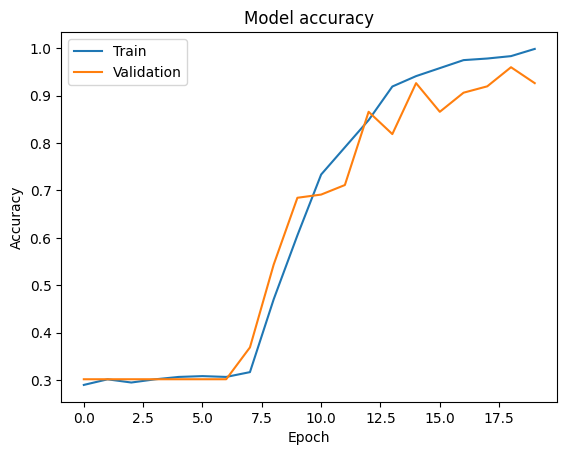

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model Comparasion

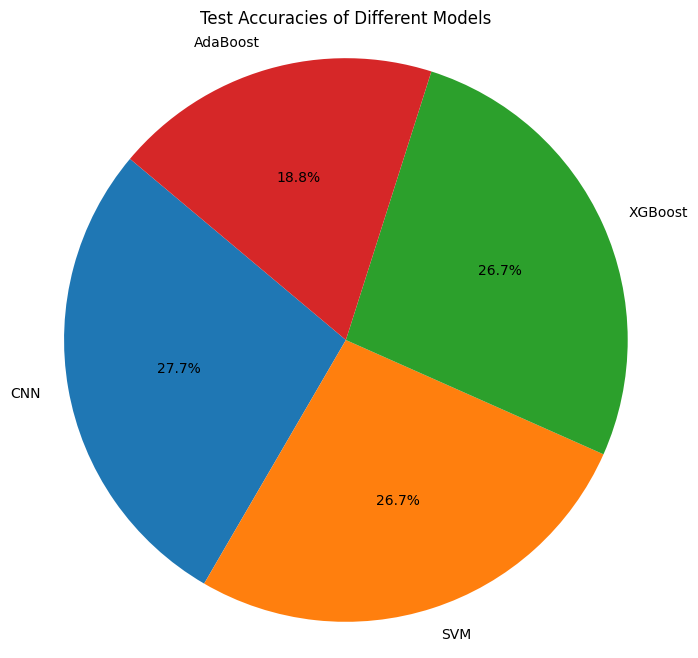

In [ ]:
test_accuracies = [test_accuracy, svm_accuracy, xgb_accuracy, adaboost_accuracy]
model_names = ['CNN', 'SVM', 'XGBoost', 'AdaBoost']

plt.figure(figsize=(8, 8))
plt.pie(test_accuracies, labels=model_names, autopct='%1.1f%%', startangle=140)
plt.title('Test Accuracies of Different Models')
plt.axis('equal')
plt.show()

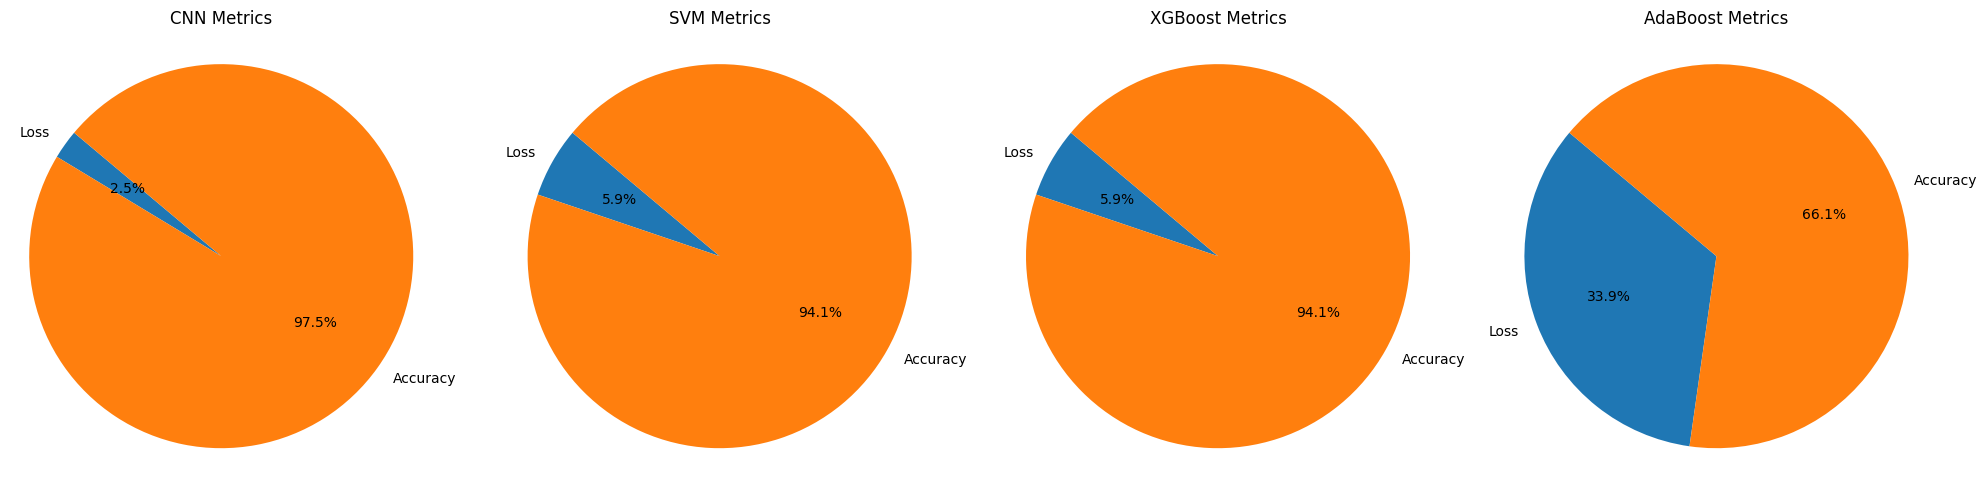

In [ ]:
test_metrics = [(1 - test_accuracy,test_accuracy ), (1 - svm_accuracy, svm_accuracy),
                (1 - xgb_accuracy, xgb_accuracy), (1 - adaboost_accuracy, adaboost_accuracy)]
model_names = ['CNN', 'SVM', 'XGBoost', 'AdaBoost']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, (loss, accuracy), model_name in zip(axes, test_metrics, model_names):
    ax.pie([loss, accuracy], labels=['Loss', 'Accuracy'], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{model_name} Metrics')
    ax.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
!pip install torch spikingjelly brian2 snntorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.6/437.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
import torch
from torch.utils.data import DataLoader, TensorDataset
import os
import cv2
from sklearn.model_selection import train_test_split
from snntorch import spikegen
import snntorch.spikeplot as splt
from IPython.display import HTML

path = '/content/drive/MyDrive/ECG_Data/train'
label_dict = {
    'ECG Images of Myocardial Infarction Patients (240x12=2880)': 0,
    'ECG Images of Patient that have History of MI (172x12=2064)': 1,
    'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 2,
    'Normal Person ECG Images (284x12=3408)': 3
}

def load_data(path, label_dict):
    data = []
    labels = []
    for category, label_value in label_dict.items():
        folder_path = os.path.join(path, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128, 128))
            data.append(img)
            labels.append(label_value)
    return np.array(data), np.array(labels)

data, labels = load_data(path, label_dict)
data = data.astype('float32') / 255.0
data = np.transpose(data, (0, 2, 1))  # PyTorch (N, H, W)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


torch.Size([100, 32, 128, 128])


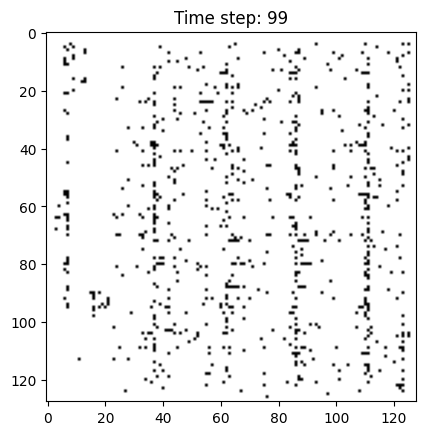

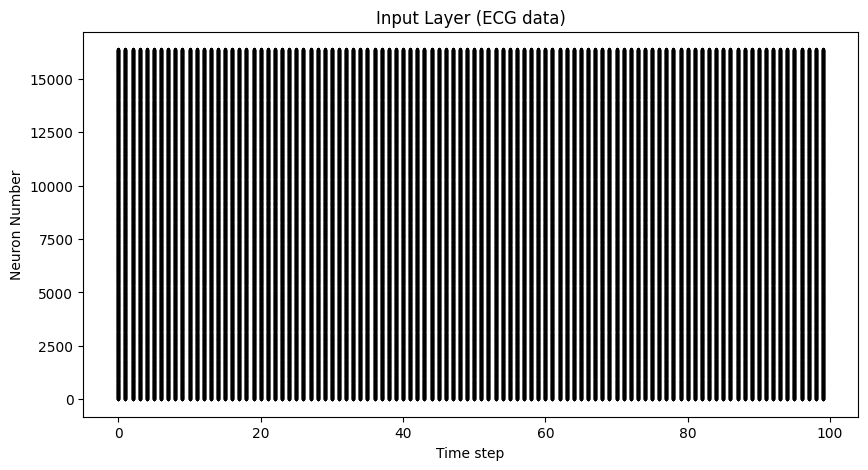

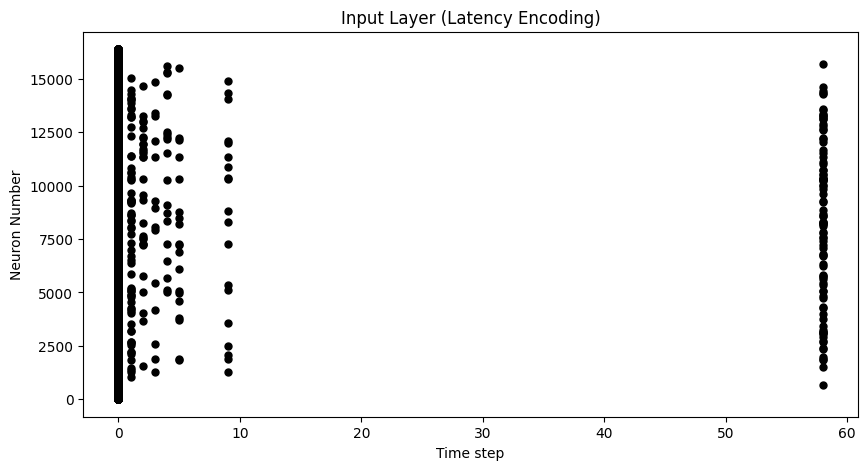

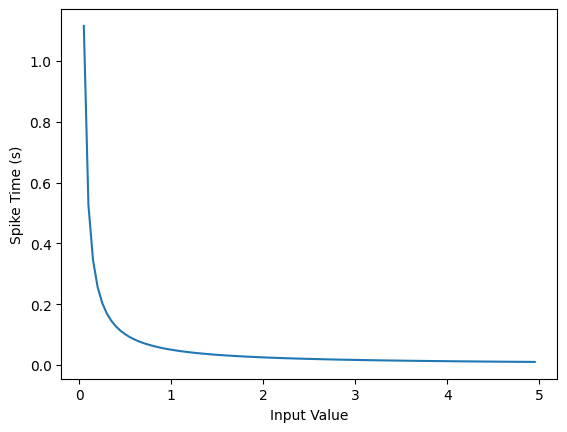

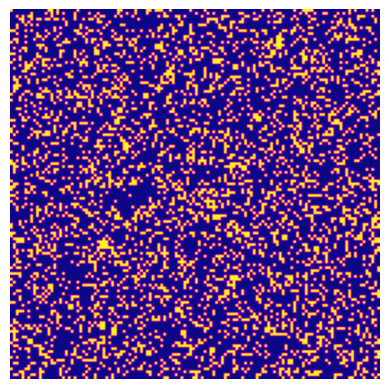

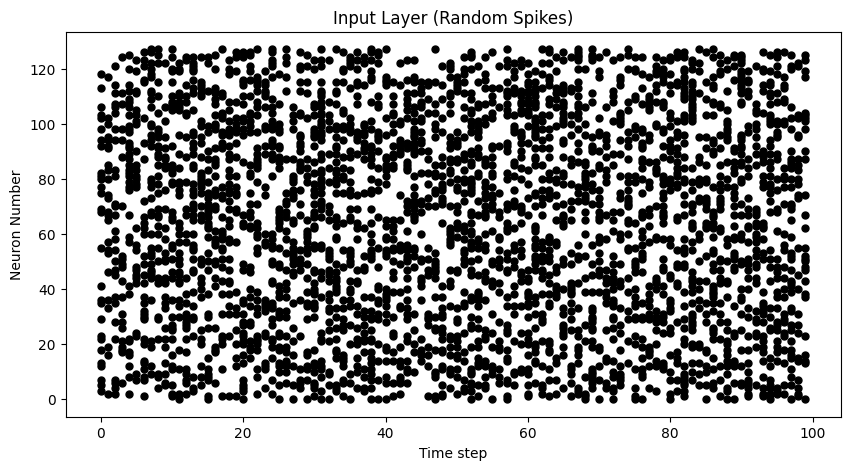

In [ ]:
num_steps = 100
dtype = torch.float
spike_data_sample = None

data_iter = iter(train_loader)
data_it, targets_it = next(data_iter)

# Spiking Data (rate coding)
spike_data = spikegen.rate(data_it, num_steps=num_steps)
print(spike_data.size())

# Spike data animation
spike_data_sample = spike_data[:, 0, :, :]
spike_data_sample = spike_data_sample.reshape(num_steps, 128, 128)
fig, ax = plt.subplots()

def animate(step):
    ax.clear()
    ax.imshow(spike_data_sample[step], cmap='gray')
    ax.set_title(f"Time step: {step}")

import matplotlib.animation as animation
anim = animation.FuncAnimation(fig, animate, frames=num_steps, interval=50, blit=False)
HTML(anim.to_html5_video())

# raster plot for spiking data
spike_data_sample2 = spike_data_sample.reshape((num_steps, -1))

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data_sample2, ax, s=1.5, c="black")
plt.title("Input Layer (ECG data)")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

# Process the data for latency encoding
spike_data_latency = spikegen.latency(data_it, num_steps=num_steps, tau=5, threshold=0.01)

fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data_latency[:, 0].view(num_steps, -1), ax, s=25, c="black")
plt.title("Input Layer (Latency Encoding)")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

def convert_to_time(data, tau=5, threshold=0.01):
    spike_time = tau * torch.log(data / (data - threshold))
    return spike_time

raw_input = torch.arange(0, 5, 0.05)
spike_times = convert_to_time(raw_input)

plt.plot(raw_input, spike_times)
plt.xlabel('Input Value')
plt.ylabel('Spike Time (s)')
plt.show()

spike_prob = torch.rand((num_steps, 128, 128), dtype=dtype) * 0.5
spike_rand = spikegen.rate_conv(spike_prob)

fig, ax = plt.subplots()
anim = splt.animator(spike_rand, fig, ax)
HTML(anim.to_html5_video())

# Raster plot for random spikes
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_rand[:, 0].view(num_steps, -1), ax, s=25, c="black")
plt.title("Input Layer (Random Spikes)")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()